In [9]:
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib notebook

In [2]:
# datasets/tesla-stock.csv
df = pd.read_csv('/Users/surendra/workspaces/python-workspace/notebooks/datasets/tesla-stock.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.shape

(1692, 7)

In [5]:
# convert object data type to datetime64 
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [6]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

<IPython.core.display.Javascript object>


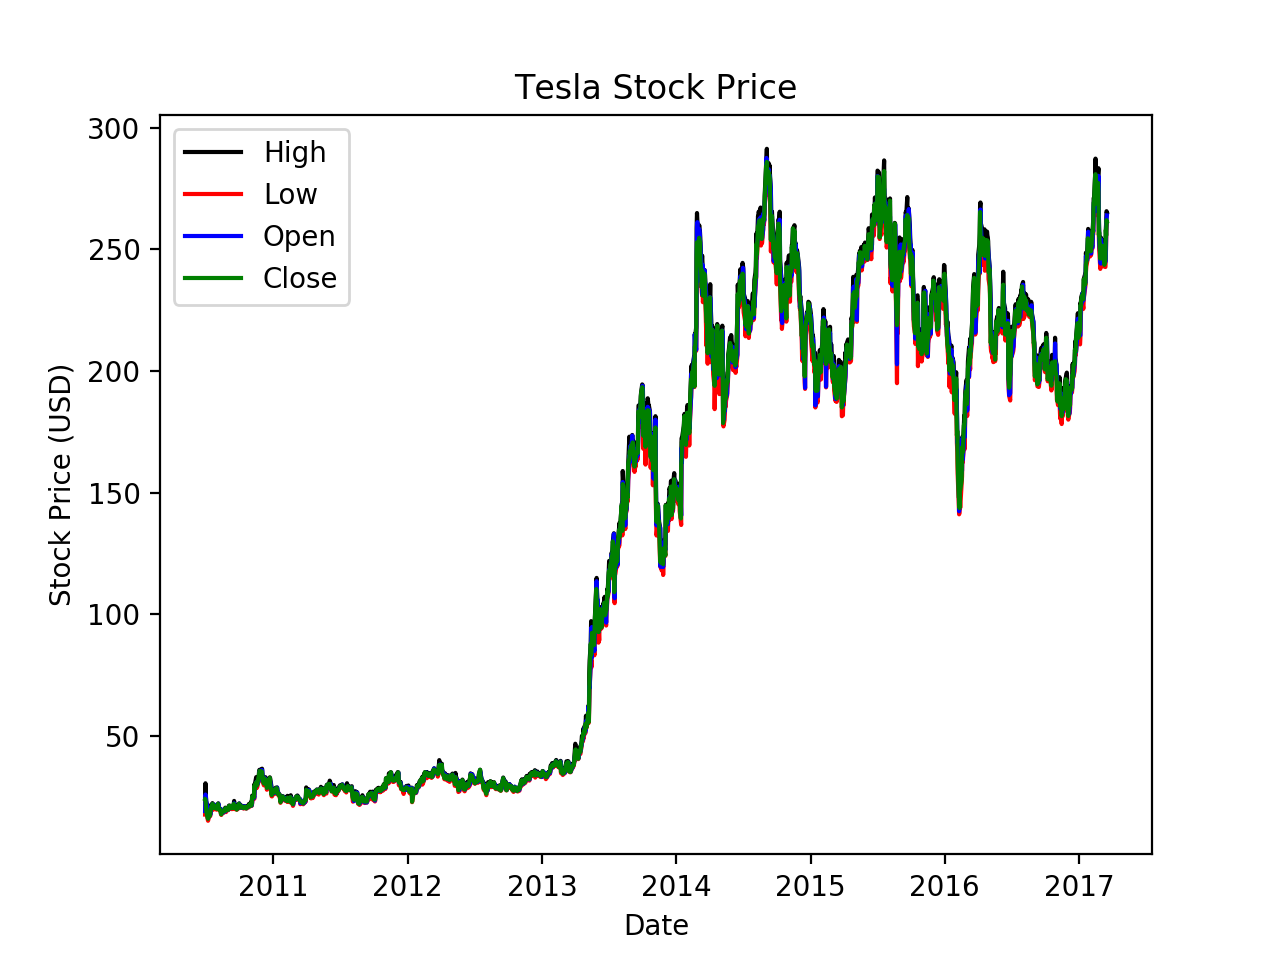

In [10]:
plt.plot_date(df['Date'], df['High'], '-', label='High', color='k')
plt.plot_date(df['Date'], df['Low'], '-', label='Low', color='r')
plt.plot_date(df['Date'], df['Open'], '-', label='Open', color='b')
plt.plot_date(df['Date'], df['Close'], '-', label='Close', color='g')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Tesla Stock Price')
plt.legend()
plt.show()

### Basic customization

<IPython.core.display.Javascript object>


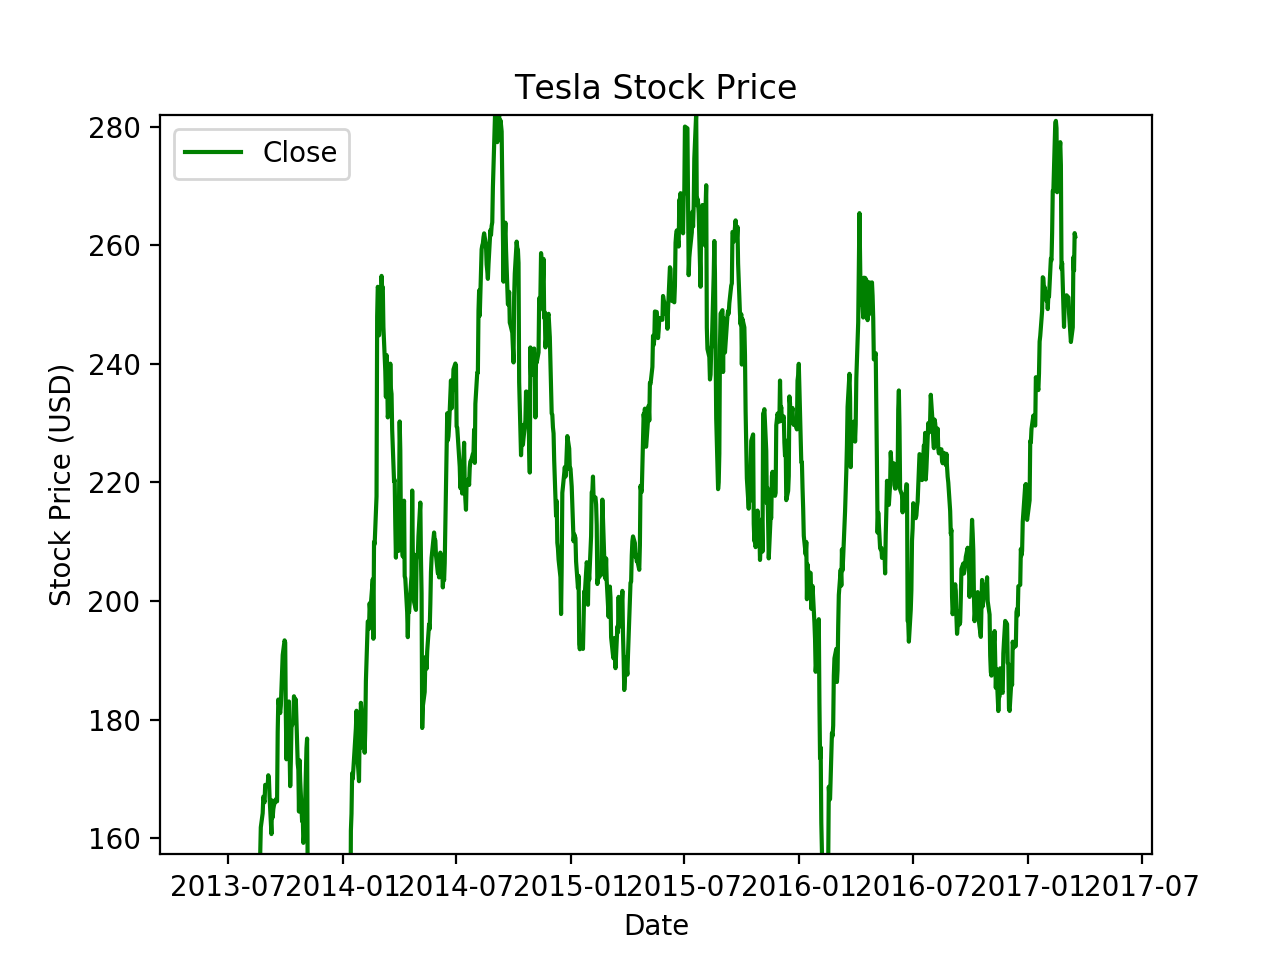

In [84]:
plt.plot_date(df['Date'], df['Adj Close'], '-', label='Close', color='g')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Tesla Stock Price')
plt.legend()
plt.show()

> If you zoom in the graph the labels get messy 

<IPython.core.display.Javascript object>


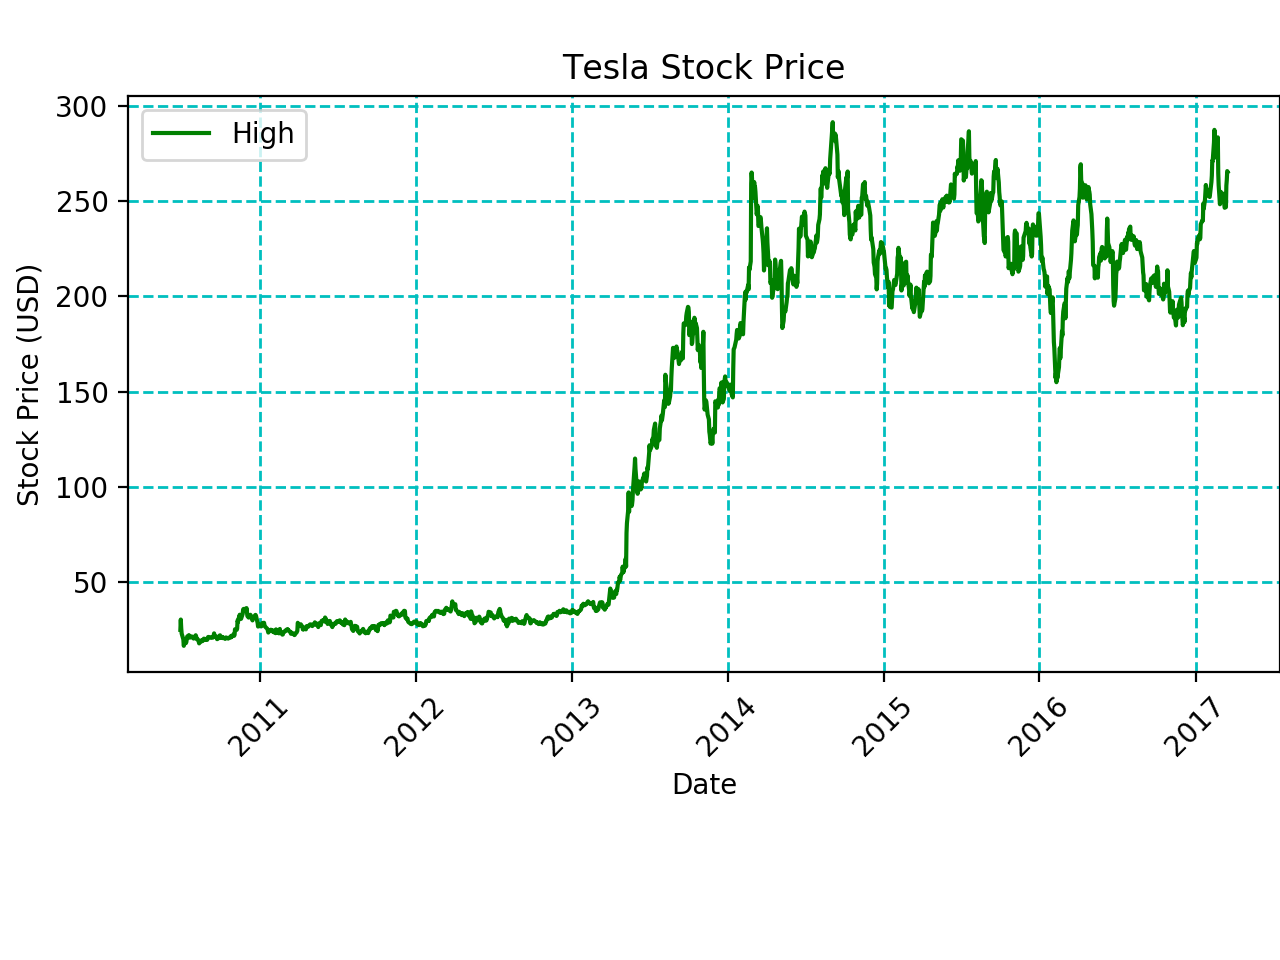

In [16]:
fig = plt.figure()

xdata, ydata = df['Date'], df['High']

# start a subplot to customize
ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), rowspan=1, colspan=1)
# (grid size), (current subplot index), rowspan=1, colspan=1 default parms

ax1.plot_date(xdata, ydata, '-', label='High', color='g')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

ax1.grid(True, color='c', linestyle='--', linewidth=1)
# ax1.grid(True) # default enable the grid

plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Tesla Stock Price')
plt.legend()
# wspace and hspace for multiple plots
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.3, wspace=0.2, hspace=0)
plt.show()

# xlabel angled at 45ᵒ even though map zoomed 

```py
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.3, wspace=0.2, hspace=0)
```
**The parameter meanings (and suggested defaults) are::**
```py
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.2   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height
```

### More customization

<IPython.core.display.Javascript object>


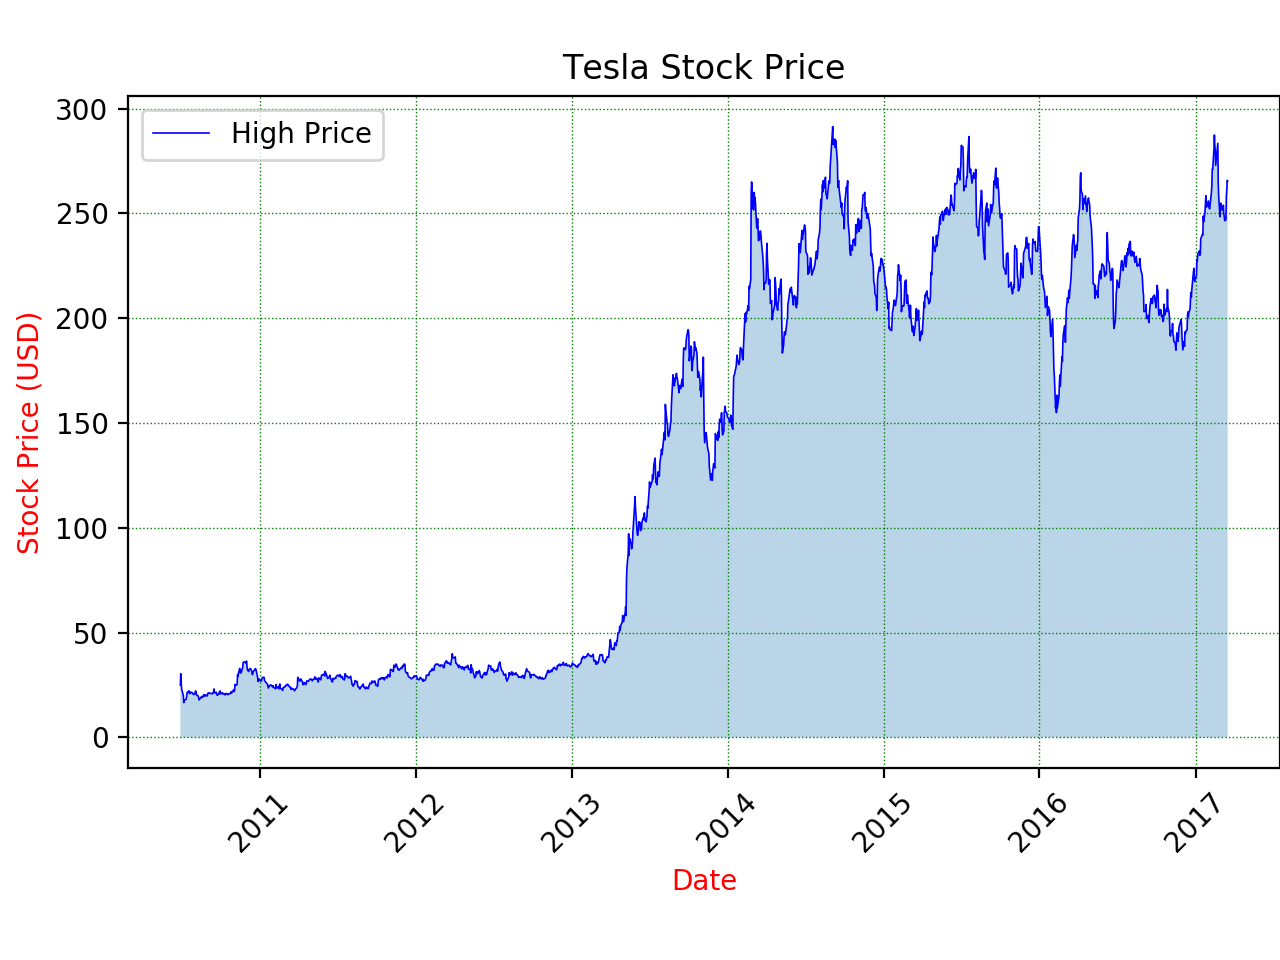

In [41]:
fig = plt.figure()

# to use fill_between the data shoud be finate
xdata, ydata = list(df['Date']), list(df['High'])

# start a subplot to customize
# (grid size), (current subplot index), rowspan=1, colspan=1 default parms
ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), rowspan=1, colspan=1)

# plot the date series
ax1.plot_date(xdata, ydata, '-', label='High Price', color='b', linewidth=0.6)

# for each label in xaxis rotate the label
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

# ax1.grid(True) # default enable the grid
ax1.grid(True, color='g', linestyle=':', linewidth=0.5)

# change x, y axis label colors
ax1.xaxis.label.set_color('r')
ax1.yaxis.label.set_color('r')

# fill the graph area
# 0 -> the reference point for the filling
# 0 is from starting of y axis
ax1.fill_between(xdata, ydata, 0, alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Tesla Stock Price')
plt.legend()
# wspace and hspace for multiple plots
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.2, wspace=0.2, hspace=0)
plt.show()

# xlabel angled at 45ᵒ even though map zoomed 

In [67]:
import numpy as np
from datetime import date

<IPython.core.display.Javascript object>


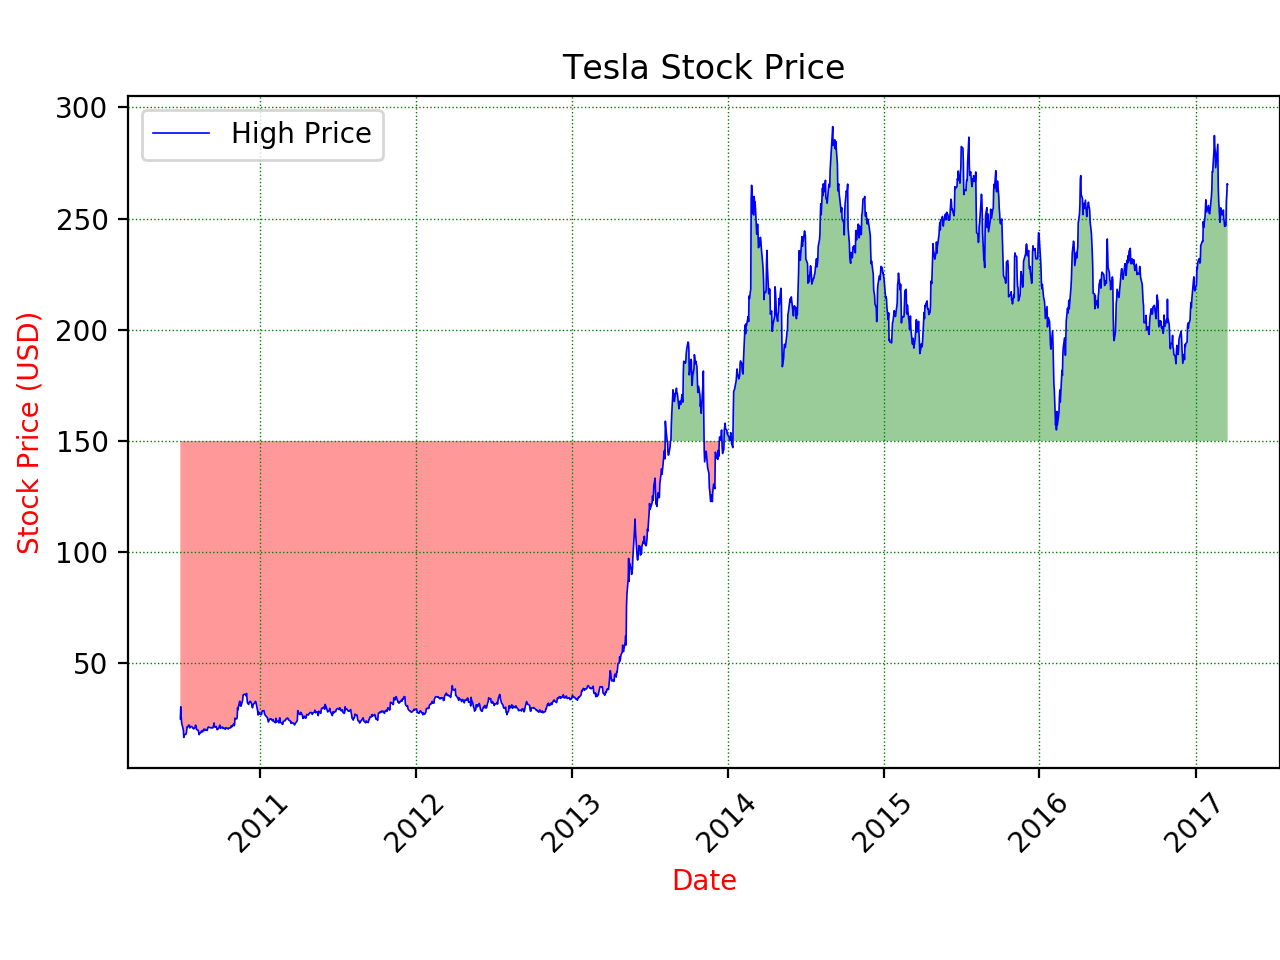

In [55]:
fig = plt.figure()

# to use fill_between the data shoud be converter to numpy arrays
xdata, ydata = np.array(df['Date']), np.array(df['High'])

# start a subplot to customize
# (grid size), (current subplot index), rowspan=1, colspan=1 default parms
ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), rowspan=1, colspan=1)

# plot the date series
ax1.plot_date(xdata, ydata, '-', label='High Price', color='b', linewidth=0.6)

# for each label in xaxis rotate the label
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

# ax1.grid(True) # default enable the grid
ax1.grid(True, color='g', linestyle=':', linewidth=0.5)

# change x, y axis label colors
ax1.xaxis.label.set_color('r')
ax1.yaxis.label.set_color('r')

# fill the graph area based on conditions and starting point
my_price = 150
ax1.fill_between(xdata, ydata, my_price, alpha=0.4, where=(ydata > my_price), facecolor='g')
ax1.fill_between(xdata, ydata, my_price, alpha=0.4, where=(ydata < my_price), facecolor='r')

plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Tesla Stock Price')
plt.legend()
# wspace and hspace for multiple plots
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.2, wspace=0.2, hspace=0)
plt.show()

# xlabel angled at 45ᵒ even though map zoomed 

**If we take $150 as our reference point the `red` part is loss and `green` part is profit**

**Changed the reference `y` filling point and adding filling conditions**
```py
my_price = 150
ax1.fill_between(xdata, ydata, my_price, alpha=0.4, where=(ydata > my_price), facecolor='g')
```
> `facecolor='g'` is polygon fill color

> `my_price = 150` changes the starting point of filling

> `where=(ydata > my_price)` conditional filling

**You can't show legend for green/red but it can be done by using fake plots**

<IPython.core.display.Javascript object>


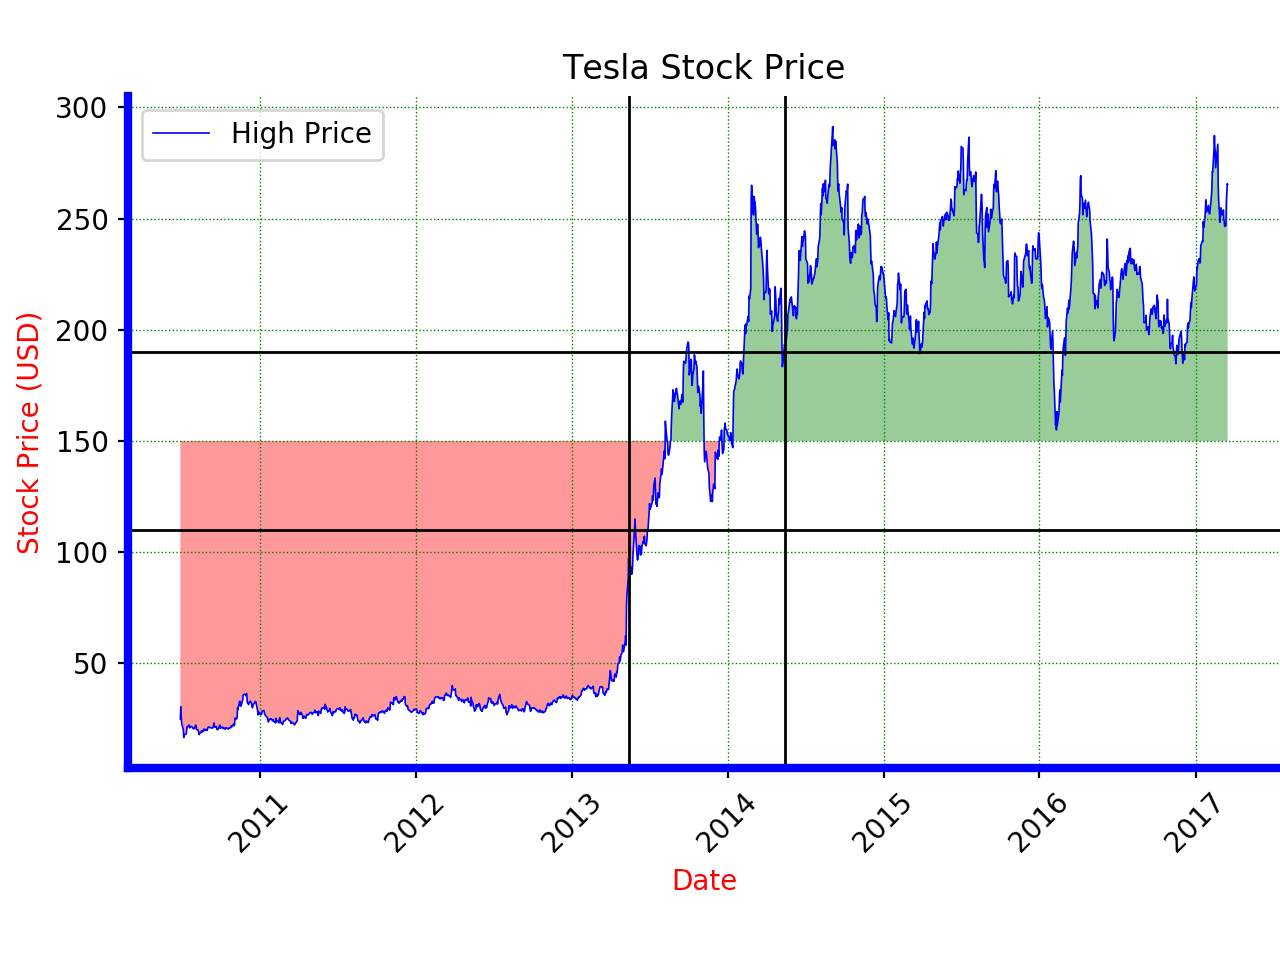

In [68]:
fig = plt.figure()

# to use fill_between the data shoud be converter to numpy arrays
xdata, ydata = np.array(df['Date']), np.array(df['High'])

# start a subplot to customize
# (grid size), (current subplot index), rowspan=1, colspan=1 default parms
ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), rowspan=1, colspan=1)

# plot the date series
ax1.plot_date(xdata, ydata, '-', label='High Price', color='b', linewidth=0.6)

# for each label in xaxis rotate the label
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

# ax1.grid(True) # default enable the grid
ax1.grid(True, color='g', linestyle=':', linewidth=0.5)

# change x, y axis label colors
ax1.xaxis.label.set_color('r')
ax1.yaxis.label.set_color('r')

# fill the graph area based on conditions and starting point
my_price = 150
ax1.fill_between(xdata, ydata, my_price, alpha=0.4, where=(ydata > my_price), facecolor='g')
ax1.fill_between(xdata, ydata, my_price, alpha=0.4, where=(ydata < my_price), facecolor='r')

# plying with spines
#  4 spines left, right, top, bottom
ax1.spines['left'].set_color('b')
ax1.spines['left'].set_linewidth(3)

ax1.spines['bottom'].set_color('b')
ax1.spines['bottom'].set_linewidth(3)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# draw lines on plot parllel to x and y axis
# horizontal lines
ax1.axhline(my_price - 40, color='k', linewidth=1)
ax1.axhline(my_price + 40, color='k', linewidth=1)
# vertical lines
ax1.axvline(date(2013, 5, 15), color='k', linewidth=1)
ax1.axvline(date(2014, 5, 15), color='k', linewidth=1)

plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Tesla Stock Price')
plt.legend()
# wspace and hspace for multiple plots
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.2, wspace=0.2, hspace=0)
plt.show()

# xlabel angled at 45ᵒ even though map zoomed 

In [65]:
type(xdata[0])

numpy.datetime64